<a href="https://colab.research.google.com/github/318281029SBH/Escuela/blob/main/LogisticRegression_ChurnClients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Carga de datos

In [4]:
df=pd.read_csv('/content/drive/MyDrive/dataSet/churn.csv')

In [5]:
df.shape

(7043, 21)

In [6]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df['Churn'].value_counts(1)

,proportion
Churn,
No,0.73463
Yes,0.26537


In [8]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

#Conjuntos de entrenamiento y prueba

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1), df['Churn'], test_size=0.3, stratify=df['Churn'], random_state=42)

In [10]:
y_train.value_counts(1)

,proportion
Churn,
0,0.734686
1,0.265314


##OverSampling

In [11]:
tgt=['Churn']
um=['customerID']
var=[col for col in df.columns if col not in tgt]

In [12]:
ros= RandomOverSampler(random_state=0)
X_ros,y_ros=ros.fit_resample(X_train[var],y_train)
# Combine X_ros and y_r0s into a single DataFrame
data_ros = pd.concat([X_ros, y_ros], axis=1)

In [13]:
data_ros['Churn'].value_counts(1)

,proportion
Churn,
0,0.5
1,0.5


In [14]:
data_ros.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#Cat_variables

CAT_VARIABLES

In [15]:
var_ord= ['tenure','MonthlyCharges','TotalCharges']
var_cat = [col for col in list(df.columns) if col not in var_ord+tgt+um]

In [16]:
def freq(df, var):

    if type(var) != list:
        var = [var]
    for v in var:
        #v = 'state'
        aux = df[v].value_counts().to_frame().rename(columns={'count':'FA'})
        aux['FR'] = aux['FA'] / aux['FA'].sum()
        aux[['FAA','FRA']] = aux.apply(  np.cumsum )
        print(f"La variable: {v}")
        display(aux)
        print("\n")

In [17]:
freq(data_ros, var_cat)

La variable: gender


,FA,FR,FAA,FRA
gender,,,,
Female,3629,0.500966,3629,0.500966
Male,3615,0.499034,7244,1.000000




La variable: SeniorCitizen


,FA,FR,FAA,FRA
SeniorCitizen,,,,
0,5860,0.808945,5860,0.808945
1,1384,0.191055,7244,1.000000




La variable: Partner


,FA,FR,FAA,FRA
Partner,,,,
No,4055,0.559774,4055,0.559774
Yes,3189,0.440226,7244,1.000000




La variable: Dependents


,FA,FR,FAA,FRA
Dependents,,,,
No,5394,0.744616,5394,0.744616
Yes,1850,0.255384,7244,1.000000




La variable: PhoneService


,FA,FR,FAA,FRA
PhoneService,,,,
Yes,6550,0.904197,6550,0.904197
No,694,0.095803,7244,1.000000




La variable: MultipleLines


,FA,FR,FAA,FRA
MultipleLines,,,,
No,3390,0.467973,3390,0.467973
Yes,3160,0.436223,6550,0.904197
No phone service,694,0.095803,7244,1.000000




La variable: InternetService


,FA,FR,FAA,FRA
InternetService,,,,
Fiber optic,3806,0.525400,3806,0.525400
DSL,2230,0.307841,6036,0.833241
No,1208,0.166759,7244,1.000000




La variable: OnlineSecurity


,FA,FR,FAA,FRA
OnlineSecurity,,,,
No,4228,0.583655,4228,0.583655
Yes,1808,0.249586,6036,0.833241
No internet service,1208,0.166759,7244,1.000000




La variable: OnlineBackup


,FA,FR,FAA,FRA
OnlineBackup,,,,
No,3685,0.508697,3685,0.508697
Yes,2351,0.324544,6036,0.833241
No internet service,1208,0.166759,7244,1.000000




La variable: DeviceProtection


,FA,FR,FAA,FRA
DeviceProtection,,,,
No,3636,0.501933,3636,0.501933
Yes,2400,0.331309,6036,0.833241
No internet service,1208,0.166759,7244,1.000000




La variable: TechSupport


,FA,FR,FAA,FRA
TechSupport,,,,
No,4167,0.575235,4167,0.575235
Yes,1869,0.258007,6036,0.833241
No internet service,1208,0.166759,7244,1.000000




La variable: StreamingTV


,FA,FR,FAA,FRA
StreamingTV,,,,
No,3038,0.419382,3038,0.419382
Yes,2998,0.413860,6036,0.833241
No internet service,1208,0.166759,7244,1.000000




La variable: StreamingMovies


,FA,FR,FAA,FRA
StreamingMovies,,,,
No,3052,0.421314,3052,0.421314
Yes,2984,0.411927,6036,0.833241
No internet service,1208,0.166759,7244,1.000000




La variable: Contract


,FA,FR,FAA,FRA
Contract,,,,
Month-to-month,4758,0.656819,4758,0.656819
Two year,1265,0.174627,6023,0.831447
One year,1221,0.168553,7244,1.000000




La variable: PaperlessBilling


,FA,FR,FAA,FRA
PaperlessBilling,,,,
Yes,4646,0.641358,4646,0.641358
No,2598,0.358642,7244,1.000000




La variable: PaymentMethod


,FA,FR,FAA,FRA
PaymentMethod,,,,
Electronic check,2950,0.407234,2950,0.407234
Mailed check,1515,0.209139,4465,0.616372
Bank transfer (automatic),1421,0.196162,5886,0.812535
Credit card (automatic),1358,0.187465,7244,1.000000


Conclusión: Cada categoría tiene una porcentaje representativo y ninguna variable necesita ser normalizada

#Ord_Variables

In [18]:
from sklearn.preprocessing import KBinsDiscretizer
def discretizar_2(df_aux, v, k):

    kb = KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='quantile', subsample=None)
    df_aux = df_aux.copy()

    # Asegurar que no haya valores NaN antes de discretizar
    df_aux[v] = pd.to_numeric(df_aux[v], errors='coerce')
    df_aux = df_aux.dropna(subset=[v])
    # Ajustar el discretizador
    kb.fit(df_aux[[v]])

    # Obtain the discretized values
    discretized_values = kb.transform(df_aux[[v]])

    # Get the bin edges
    bins = kb.bin_edges_[0]

    # Create interval strings using pd.cut()
    df_aux[f'd_{v}_{k}'] = pd.cut(df_aux[v], bins=bins, include_lowest=True).astype(str)


    return kb, df_aux

In [19]:
kb_list=[]
for v in var_ord:
    for k in range(2, 5):
        # cuando k es mayor al número de valores únicos
        if data_ros[v].nunique() < k:
            print(f"Saltando {v} con {k} bins porque tiene pocos valores únicos.")
            continue
        print(f"Para la variable {v}, con {k} bins.")
        #df = discretizar(df, v, k)
        aux,data_ros = discretizar_2(data_ros, v, k)
        kb_list.append(aux)

Para la variable tenure, con 2 bins.
Para la variable tenure, con 3 bins.
Para la variable tenure, con 4 bins.
Para la variable MonthlyCharges, con 2 bins.
Para la variable MonthlyCharges, con 3 bins.
Para la variable MonthlyCharges, con 4 bins.
Para la variable TotalCharges, con 2 bins.
Para la variable TotalCharges, con 3 bins.
Para la variable TotalCharges, con 4 bins.


In [20]:
zipped_vars = zip(data_ros.filter(like='d_').columns.tolist(), kb_list)
# This would yield ('VarName_i', 'Kb_i')
kb_dictionary = dict(zipped_vars)

#Selección de variables

In [33]:
def calculo_iv(df , v, tgt, um):
    #v = 'n_week_day_2'
    aux = df.pivot_table( index = v , columns=tgt, values=um, aggfunc='count', fill_value=0 )
    aux[ list(range(2)) ] = aux/aux.apply(np.sum)
    aux['w'] = np.log( aux[0] / aux[1] )
    aux['iv'] = (aux[0] - aux[1])*aux['w']

    return v, aux['iv'].sum()

Ordinales, discretizadas

In [34]:
vard=data_ros.filter(like='d_').columns.tolist()

In [35]:
### IV para las variables discretizadas:
iv  = pd.DataFrame( map( lambda v: calculo_iv(data_ros, v, tgt, um) , vard) , columns=['variable','IV'] ).sort_values('IV',ascending=False)
iv

,variable,IV
2,d_tenure_4,0.695531
1,d_tenure_3,0.630068
0,d_tenure_2,0.510800
8,d_TotalCharges_4,0.272175
5,d_MonthlyCharges_4,0.247165
7,d_TotalCharges_3,0.223436
6,d_TotalCharges_2,0.194527
4,d_MonthlyCharges_3,0.170950
3,d_MonthlyCharges_2,0.163464


Categóricas

In [36]:
iv2  = pd.DataFrame( map( lambda v: calculo_iv(data_ros, v, tgt, um) , var_cat ) , columns=['variable','IV'] ).sort_values('IV',ascending=False)
iv2

,variable,IV
13,Contract,1.207179
7,OnlineSecurity,0.717065
10,TechSupport,0.690450
6,InternetService,0.634523
8,OnlineBackup,0.553974
9,DeviceProtection,0.510748
15,PaymentMethod,0.446202
12,StreamingMovies,0.388633
11,StreamingTV,0.388312
14,PaperlessBilling,0.212099


In [37]:
best_d=iv.loc[iv['IV']>0.2]
best_c=iv2.loc[iv2['IV']>0.2]

In [38]:
best=pd.concat([best_d,best_c])

In [39]:
best

,variable,IV
2,d_tenure_4,0.695531
1,d_tenure_3,0.630068
0,d_tenure_2,0.510800
8,d_TotalCharges_4,0.272175
5,d_MonthlyCharges_4,0.247165
7,d_TotalCharges_3,0.223436
13,Contract,1.207179
7,OnlineSecurity,0.717065
10,TechSupport,0.690450
6,InternetService,0.634523


In [40]:
best_gen_vars=[]
for v in var_ord+var_cat:
  if best[best['variable'].str.contains(v)].shape[0]>0:
    best_gen_vars.append(v)

In [41]:
best_gen_vars

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [42]:
best_var=[]
for v in best_gen_vars:
  best_var.append(best[best['variable'].str.contains(v)].sort_values('IV',ascending=False)['variable'].values[0])
best_var

['d_tenure_4',
 'd_MonthlyCharges_4',
 'd_TotalCharges_4',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

#WOE

In [43]:
def clasificacion_woe(df , v, tgt, um):
    #v = 'n_week_day_2'
    aux = df.pivot_table( index = v ,
                          columns=tgt,
                         values=um,
                         aggfunc='count',
                         fill_value=0 )

    aux[ list(range(2)) ] = aux/aux.apply(np.sum)

    aux['w'] = np.log( aux[0] / aux[1] )

    aux.drop(range(2),axis=1,inplace=True)

    #aux = aux.to_dict()['w']
    aux = aux['w'].to_dict()



    return v, aux

In [44]:
mapa_woe = list( map( lambda v: clasificacion_woe( data_ros, v , tgt , um) , best_var ))

In [45]:
for v, mapa in mapa_woe:
    data_ros['w_'+v] = data_ros[v].replace(mapa)

/tmp/ipython-input-827737227.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_ros['w_'+v] = data_ros[v].replace(mapa)
/tmp/ipython-input-827737227.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_ros['w_'+v] = data_ros[v].replace(mapa)
/tmp/ipython-input-827737227.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [46]:
varw=data_ros.filter(like='w_').columns.tolist()

In [47]:
tad_train=data_ros[varw+tgt]

In [48]:
tad_train

,w_d_tenure_4,w_d_MonthlyCharges_4,w_d_TotalCharges_4,w_InternetService,w_OnlineSecurity,w_OnlineBackup,w_DeviceProtection,w_TechSupport,w_StreamingTV,w_StreamingMovies,w_Contract,w_PaperlessBilling,w_PaymentMethod,Churn
0,-1.174963,-0.465368,-0.129820,-0.694367,-0.686957,-0.630735,-0.583713,-0.679357,-0.196309,-0.324313,-0.730247,0.628696,-0.822865,0
1,-1.174963,-0.465368,-0.782989,-0.694367,-0.686957,-0.630735,0.212888,-0.679357,-0.196309,-0.324313,-0.730247,-0.343404,-0.822865,1
2,-1.174963,-0.465368,-0.782989,-0.694367,-0.686957,-0.630735,-0.583713,-0.679357,-0.321569,-0.324313,-0.730247,-0.343404,0.710586,1
3,1.212713,-0.465368,0.673575,0.450247,-0.686957,-0.630735,0.212888,0.649601,-0.196309,-0.193051,1.123612,0.628696,0.710586,0
4,-0.326352,-0.350851,-0.129820,-0.694367,0.715082,-0.630735,-0.583713,0.649601,-0.196309,-0.193051,-0.730247,-0.343404,0.573752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,-1.174963,0.830653,-0.782989,1.533663,1.533663,1.533663,1.533663,1.533663,1.533663,1.533663,-0.730247,-0.343404,0.710586,1
7240,-0.326352,-0.350851,0.227066,-0.694367,-0.686957,-0.630735,0.212888,-0.679357,-0.196309,-0.193051,-0.730247,-0.343404,-0.822865,1
7241,-0.326352,0.015194,-0.129820,-0.694367,-0.686957,-0.630735,-0.583713,-0.679357,-0.321569,-0.324313,-0.730247,-0.343404,0.388121,1
7242,-1.174963,0.015194,-0.782989,0.450247,-0.686957,-0.630735,0.212888,-0.679357,-0.321569,-0.324313,-0.730247,0.628696,0.388121,1


#modeloRegrLog

In [57]:
model=LogisticRegression()

In [58]:
model.fit( tad_train[varw], tad_train[tgt])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

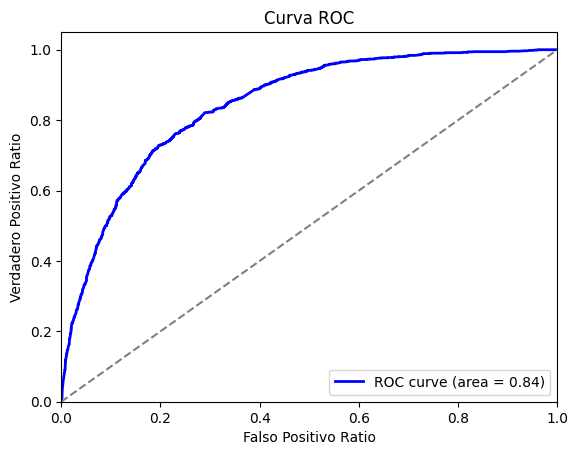

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_true = tad_train['Churn']
y_scores = model.predict_proba(tad_train[varw])[:,1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falso Positivo Ratio")
plt.ylabel("Verdadero Positivo Ratio")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

#Validacin

##TAD_validación

In [109]:
X_test.shape,y_test.shape

((2113, 20), (2113,))

In [110]:
ros= RandomOverSampler(random_state=1)
X_test,y_test=ros.fit_resample(X_test[var],y_test)

In [111]:
data_test = pd.concat([X_test, y_test], axis=1)

In [114]:
data_test.shape, data_test['Churn'].value_counts(1)

((3104, 21),
 Churn
 1    0.5
 0    0.5
 Name: proportion, dtype: float64)

In [99]:
best_d = [v for v in best_var if 'd_' in v]
best_d

['d_tenure_4', 'd_MonthlyCharges_4', 'd_TotalCharges_4']

In [51]:
kb_list=[kb_dictionary.get(v) for v in best_d]

In [115]:
def discretizar_1(df_aux, v, k):
  df_aux = data_test.copy()
  # Asegurar que no haya valores NaN antes de discretizar
  df_aux[v] = pd.to_numeric(df_aux[v], errors='coerce')
  df_aux = df_aux.dropna(subset=[v])

  bins = kb_list[k].bin_edges_[0]
  df_aux[f'd_{v}_{4}'] = pd.cut(df_aux[v], bins=bins, include_lowest=True).astype(str)
  return df_aux

In [116]:
k=0
for v in var_ord:
  data_test=discretizar_1(data_test, v, k)
  k=k+1

In [117]:
data_test = data_test.replace('nan', np.nan)

In [118]:
data_test.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [119]:
data_test.dropna(inplace=True)

In [120]:
for v, mapa in mapa_woe:
    data_test['w_'+v] = data_test[v].replace(mapa)

/tmp/ipython-input-1606557835.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test['w_'+v] = data_test[v].replace(mapa)
/tmp/ipython-input-1606557835.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test['w_'+v] = data_test[v].replace(mapa)
/tmp/ipython-input-1606557835.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [121]:
tad_test=data_test[varw+tgt]

##Resultados

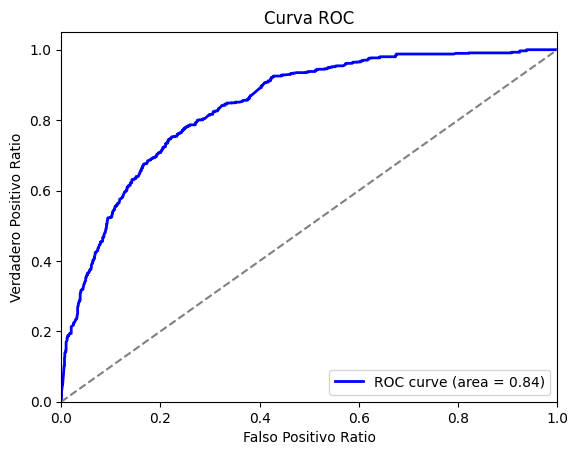

In [122]:
y_true = tad_test['Churn']
y_scores = model.predict_proba(tad_test[varw])[:,1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falso Positivo Ratio")
plt.ylabel("Verdadero Positivo Ratio")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()